# Table of Contents

- [Table of Content](#table-of-content)
- [0-General](#0-general)
  - [0-Introduction](#0-introduction)
  - [0-Objective](#0-objective)
  - [0-Analysis](#0-analysis)
  - [0-Data Dictionary](#0-data-dictionary)
  - [0-Acknowledgements](#0-acknowledgements)


# 0-General
[Back to Table of Contents](#table-of-contents)

## Evaluating the Feasibility of Using Trained Dogs to Detect Lung Cancer from Patient-Worn Masks


## 0-Introduction
[Back to Table of Contents](#table-of-contents)

This project investigates the feasibility of using trained detection dogs to identify lung cancer based on scent samples collected via patient-worn masks. Prior research suggests that dogs are capable of detecting disease-related volatile organic compounds (VOCs). The dataset includes detailed records of testing sessions, mask conditions, dog-specific responses, and contextual variables (e.g., mood, weather), which will be analyzed to assess both the accuracy and influencing factors of detection performance.


## 0-Objectives
[Back to Table of Contents](#table-of-contents)

1. **Primary Objective**:  
   Assess the diagnostic accuracy of trained dogs in identifying lung cancer from patient-worn masks.
2. **Secondary Objective**:  
   Identify variables that influence detection performance, including dog mood, handler mood, and environmental conditions (e.g., weather, temperature).
3. **Exploratory Objective**:  
   Conduct a sensitivity analysis to examine whether diagnostic accuracy declines when fewer dogs are involved in a testing setup.


## 0-Analysis Plan
[Back to Table of Contents](#table-of-contents)




## 0-Data Dictionary
[Back to Table of Content](#table-of-content)

## Data Dictionary
| Column Name                      | Description                                                                 |
|-----------------------------------|-----------------------------------------------------------------------------|



## 0-Acknowledgements
[Back to Table of Content](#table-of-contents)

XXX

## 1-Beginnings
[Back to Table of Contents](#table-of-contents)


In [1]:
# Data handling and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# File and system access
import os

# Statistical analysis
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_confint
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Evaluation metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_score, recall_score, accuracy_score
)
from collections import Counter

# Modeling and preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Visualization aesthetics
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Define the working directory
working_directory = "/Users/stevenschepanski/Documents/04_ANALYSIS/DogScan/data"
os.chdir(working_directory)

# Define the file path
file_name = "df_full.csv"

In [3]:
# Load the data into a DataFrame
complete_data = pd.read_csv(file_name, low_memory=False)

# Quick check
print(complete_data.shape)
complete_data.head()

(59500, 20)


,facility_number,board_number,Dog,is_positive_board,Date_x,True_positive_mask,Donor_ID,Mask_worn_on,Dog_response_to_mask,Decoy_mask,Dog_response_to_decoy,Notes,Date_y,Weather,Temperature,Supervisor,Total_number_search_boards,Total_number_positive_masks,Dog_mood,diagnostic_outcome
0,1,1,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
1,1,2,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
2,1,3,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
3,1,4,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN
4,1,5,Aaron,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TN


# Analysis
## Data Cleaning and Preprocessing
[Back to Table of Contents](#table-of-contents)

In [4]:
# Overview of the dataset
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   facility_number              59500 non-null  int64  
 1   board_number                 59500 non-null  int64  
 2   Dog                          59500 non-null  object 
 3   is_positive_board            59500 non-null  bool   
 4   Date_x                       3096 non-null   object 
 5   True_positive_mask           2960 non-null   float64
 6   Donor_ID                     2960 non-null   object 
 7   Mask_worn_on                 2960 non-null   object 
 8   Dog_response_to_mask         2960 non-null   float64
 9   Decoy_mask                   136 non-null    object 
 10  Dog_response_to_decoy        132 non-null    float64
 11  Notes                        4 non-null      object 
 12  Date_y                       3096 non-null   object 
 13  Weather         

- Total rows: 59,500 (matches the information from DogScan GmBH)
- Most behavioral/response columns have ~2960 non-null entries
- Variable types are int64, object, bool, and float64 which likely needs to be adjusted

In [5]:
# Check for missing values (absolute and %)
missing_counts = complete_data.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(complete_data) * 100).round(2)

# Combine into one summary table
missing_summary = pd.DataFrame({
    "Missing Values": missing_counts,
    "% Missing": missing_percent
})

# Display the missing data summary
print(missing_summary)

display(missing_summary.head(10))

                             Missing Values  % Missing
Notes                                 59496      99.99
Dog_response_to_decoy                 59368      99.78
Decoy_mask                            59364      99.77
True_positive_mask                    56540      95.03
Donor_ID                              56540      95.03
Mask_worn_on                          56540      95.03
Dog_response_to_mask                  56540      95.03
Supervisor                            56404      94.80
Dog_mood                              56404      94.80
Total_number_positive_masks           56404      94.80
Date_x                                56404      94.80
Total_number_search_boards            56404      94.80
Date_y                                56404      94.80
Weather                               56404      94.80
Temperature                           56404      94.80
facility_number                           0       0.00
board_number                              0       0.00
is_positiv

,Missing Values,% Missing
Notes,59496,99.99
Dog_response_to_decoy,59368,99.78
Decoy_mask,59364,99.77
True_positive_mask,56540,95.03
Donor_ID,56540,95.03
Mask_worn_on,56540,95.03
Dog_response_to_mask,56540,95.03
Supervisor,56404,94.80
Dog_mood,56404,94.80
Total_number_positive_masks,56404,94.80


| Variable                                                                                                                            | Missing (%) | Interpretation                                                                                                                                                                                   |
| ----------------------------------------------------------------------------------------------------------------------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `Notes`                                                                                                                             | 99.99%      | This field is almost entirely empty and likely not useful for analysis unless selectively populated in later rows. It may be removed or ignored in modeling.                                     |
| `Dog_response_to_decoy`                                                                                                             | 99.78%      | This variable only applies to **negative boards**, which are underrepresented in the original Excel file. The high missing rate is expected due to reconstructed TNs without dog responses.      |
| `Decoy_mask`                                                                                                                        | 99.77%      | Same as above: present only for decoy trials. Missingness reflects the unrecorded negatives.                                                                                                     |
| `True_positive_mask`, `Donor_ID`, `Mask_worn_on`, `Dog_response_to_mask`                                                            | \~95%       | These variables are specific to **positive mask trials**, explaining their absence for the majority of rows representing negative boards.                                                        |
| `Supervisor`, `Dog_mood`, `Total_number_positive_masks`, `Date_x`, `Date_y`, `Total_number_search_boards`, `Weather`, `Temperature` | \~94.8%     | These are facility-level metadata only available for observed rows from the original dataset. The missingness here reflects the reconstructed TN rows (which had no direct metadata originally). |
| `facility_number`, `board_number`, `is_positive_board`, `Dog`, `diagnostic_outcome`                                                 | 0%          | These are core variables created during preprocessing and fully populated for all sniffing trials. No missingness here indicates successful reconstruction of the full trial-level dataset.      |


In [6]:
# Keep Date_y if it’s more complete, or rename as needed
complete_data["Date"] = complete_data["Date_y"]

# Drop the now redundant date columns
complete_data.drop(columns=["Date_x", "Date_y"], inplace=True)

In [7]:
# Convert date fields to datetime objects
complete_data["Date"] = pd.to_datetime(complete_data["Date"], errors="coerce")
complete_data["Mask_worn_on"] = pd.to_datetime(complete_data["Mask_worn_on"], errors="coerce")


In [8]:
# Define columns that are categorical
categorical_columns = [
    "Dog", "Donor_ID", "Weather", "Supervisor", "Dog_mood", "diagnostic_outcome"
]

# Apply categorical conversion
complete_data[categorical_columns] = complete_data[categorical_columns].astype("category")

In [9]:
# Force string/numeric values, coerce errors into NaN
complete_data["Dog_response_to_decoy"] = pd.to_numeric(complete_data["Dog_response_to_decoy"], errors="coerce")
complete_data["Dog_response_to_mask"] = pd.to_numeric(complete_data["Dog_response_to_mask"], errors="coerce")
complete_data["True_positive_mask"] = pd.to_numeric(complete_data["True_positive_mask"], errors="coerce")

## Descriptive Statistics
[Back to Table of Contents](#table-of-contents)

In [10]:
# Print dataset dimensions
print("Rows:", complete_data.shape[0])  # Total sniffing events
print("Columns:", complete_data.shape[1])  # Total features

# Overview of variable types in the dataset
# Note: If duplicated category lines appear, use .apply(lambda x: x.name) for cleaner count
print(complete_data.dtypes.apply(lambda x: x.name).value_counts())


Rows: 59500
Columns: 19
category          6
float64           6
int64             2
datetime64[ns]    2
object            2
bool              1
Name: count, dtype: int64


The final dataset consists of 59,500 rows and 19 columns. These represent individual sniffing events (i.e., dog × board × facility). The variables include numerical (e.g., temperature), categorical (e.g., dog name, supervisor), boolean flags (e.g., `is_positive_board`), and timestamp information (e.g., test date, mask worn date). The distribution of variable types is well balanced for mixed-methods analysis, with 6 category, 6 float64, 2 int64, 2 datetime, 2 objects and 1 bool.

In [11]:
# Count number of trials per dog
dog_counts = complete_data["Dog"].value_counts()

# Create summary table with count and percent of total
dog_summary = pd.DataFrame({
    "N Trials": dog_counts,
    "Percent": (dog_counts / len(complete_data) * 100).round(2)
})

# Display the dog-level summary
print(dog_summary)

       N Trials  Percent
Dog                     
Aaron     11900     20.0
Aki       11900     20.0
Biest     11900     20.0
Loki      11900     20.0
Lu        11900     20.0


In [12]:
# Crosstab of outcomes per dog
outcome_by_dog = pd.crosstab(complete_data["Dog"], complete_data["diagnostic_outcome"])
print(outcome_by_dog)

diagnostic_outcome  FN  FP     TN   TP
Dog                                   
Aaron               17  26  11282  575
Aki                 15  31  11277  577
Biest               20  19  11289  572
Loki                12  30  11278  580
Lu                  19  26  11282  573


Each of the five trained dogs (**Aaron**, **Aki**, **Biest**, **Loki**, and **Lu**) contributed exactly **11,900 sniffing trials**, representing **20% each** of the total dataset. This **balanced allocation** ensures comparability across dogs and supports fair subgroup analyses of individual diagnostic performance.

A breakdown of the diagnostic outcomes per dog reveals a **high consistency in exposure to positive and negative cases**, with only minor variations in the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). For instance:

- True negatives range from **11,277 to 11,289**
- True positives range from **572 to 580**
- False positives range from **19 to 31**
- False negatives range from **12 to 20**

This distribution confirms that all dogs were exposed to a **comparable mix of trial types**, making observed performance differences interpretable as likely due to behavior or sensitivity rather than sampling bias.

In [13]:
# Drop rows with missing Weather or Date (to avoid NaT)
weather_day_counts = (
    complete_data.dropna(subset=["Weather", "Date"])
    .drop_duplicates(subset=["Date", "Weather"])  # ensure one count per weather per day
    .groupby("Weather")
    .size()
    .sort_values(ascending=False)
)

# Drop rows with missing Supervisor or Date
supervisor_day_counts = (
    complete_data.dropna(subset=["Supervisor", "Date"])
    .drop_duplicates(subset=["Date", "Supervisor"])
    .groupby("Supervisor")
    .size()
    .sort_values(ascending=False)
)

print("Unique weather conditions by date:\n", weather_day_counts)
print("\nUnique supervisors by date:\n", supervisor_day_counts)


Unique weather conditions by date:
 Weather
🌧️ regnerisch    68
☀️ sonnig        37
⛅️ bewölkt       20
dtype: int64

Unique supervisors by date:
 Supervisor
person1     55
person4     20
person3     17
person2      9
person6      7
person10     4
person7      4
person9      4
person8      3
person5      2
dtype: int64


Weather and supervisor data were consistently available for each recorded test day and were reconstructed to match the unique session metadata for all trials. Aggregating by testing day revealed that scent detection sessions took place under a range of weather conditions:

- Rainy (🌧️ regnerisch) on 68 days,
- Sunny (☀️ sonnig) on 37 days, and
- Cloudy (⛅️ bewölkt) on 20 days.

This distribution reflects a broad ecological validity of testing conditions, including adverse weather scenarios.

The sessions were supervised by 10 different individuals, with Supervisor 1 overseeing the majority of test days (55 out of 125 total dates). Other supervisors contributed to a smaller number of sessions, ranging from 2 to 20 days each. This variation offers potential for moderator analyses but also ensures that the overall diagnostic results are not attributable to a single handler's influence.

In [14]:
# Summary statistics for temperature (rounded to 2 decimal places)
temp_stats = complete_data["Temperature"].describe().round(2)
print(temp_stats)

count    3096.00
mean       15.35
std         7.86
min         0.00
25%         8.00
50%        16.00
75%        22.00
max        34.00
Name: Temperature, dtype: float64


Reported ambient temperatures during testing sessions ranged from **0 °C to 34 °C**, with a **median of 16 °C**. The **mean was 15.35 °C (SD = 7.86)**, indicating generally moderate testing conditions. However, some sessions occurred in both colder and warmer environments.

These temperature values may serve as important **environmental covariates** when evaluating dog performance, particularly if olfactory sensitivity varies with ambient temperature.

In [15]:
# Frequency of dog mood states, including missing values
print(complete_data["Dog_mood"].value_counts(dropna=False))

Dog_mood
NaN              56404
ausgeglichen      2661
motiviert          262
übermotiviert      173
Name: count, dtype: int64


Dog mood was missing in **56,404 cases**, again due to artificial row expansion during the reconstruction of true negatives. Among the **3,096 recorded entries**, the following mood states were documented:

- **Ausgeglichen** ("balanced"): *n = 2,661*
- **Motiviert** ("motivated"): *n = 262*
- **Übermotiviert** ("overmotivated"): *n = 173*

These states may reflect varying levels of **internal arousal** and **task engagement**, and should be considered as potential covariates in performance modeling.

Like weather and supervisor data, **missing dog mood entries can be reliably inferred** based on combinations of `Dog` and `Date`, as these values are constant within a testing session.

In [16]:
# Summary statistics of the number of unique search boards per facility
board_stats = complete_data.groupby("facility_number")["board_number"].nunique().describe().round(2)
print(board_stats)

count    125.00
mean      95.20
std       38.98
min       25.00
25%       75.00
50%      100.00
75%      125.00
max      200.00
Name: board_number, dtype: float64


Across the 125 facilities included in the dataset, the number of search boards ranged from **25 to 200**, with a **median of 100** boards. On average, each facility used **95.2 boards (SD = 39.0)**.

This substantial variability in testing volume suggests differences in **operational complexity and workload** across facilities. Such variation should be considered in any **facility-level** or **fatigue-sensitive** analyses, as higher board counts may influence error rates or dog performance under extended sessions.

## Data Imputation
[Back to Table of Contents](#table-of-contents)

In [17]:
# Impute 'Weather' and 'Supervisor' using facility_number
# Build a lookup table for each facility_number, taking the first observed (non-missing) entry for Weather and Supervisor
# Assumption: Weather and Supervisor were constant within each facility-day, so taking the first is safe
weather_supervisor_lookup = (
    complete_data
    .dropna(subset=["Weather", "Supervisor"])  # keep only rows with both values
    .groupby("facility_number")[["Weather", "Supervisor"]]
    .first()  # select the first valid row per facility
)

# Use the lookup table to fill missing 'Weather' values by facility
complete_data["Weather"] = complete_data["Weather"].fillna(
    complete_data["facility_number"].map(weather_supervisor_lookup["Weather"])
)

# Do the same for 'Supervisor'
complete_data["Supervisor"] = complete_data["Supervisor"].fillna(
    complete_data["facility_number"].map(weather_supervisor_lookup["Supervisor"])
)

In [18]:
# Impute 'Dog_mood' using facility_number + Dog combination
# Build a lookup table for Dog mood based on both facility and dog
# Assumption: Within a facility-day, each dog had a consistent mood entry (only one observation per dog per session)
mood_lookup = (
    complete_data
    .dropna(subset=["Dog_mood"])  # keep only non-missing mood entries
    .groupby(["facility_number", "Dog"])["Dog_mood"]
    .first()  # again, use the first valid entry
)

In [19]:
# Define a function to apply row-wise: if Dog_mood is missing, try to impute using the lookup table
def fill_mood(row):
    if pd.isna(row["Dog_mood"]):
        return mood_lookup.get((row["facility_number"], row["Dog"]), pd.NA)  # fallback is pd.NA if no match found
    return row["Dog_mood"]  # keep original if not missing

In [20]:
# Apply imputation function to each row (row-wise)
complete_data["Dog_mood"] = complete_data.apply(fill_mood, axis=1)

In [21]:
# Verify imputation results
print("Remaining missing values after imputation:")
print(complete_data[["Weather", "Supervisor", "Dog_mood"]].isnull().sum())

Remaining missing values after imputation:
Weather       0
Supervisor    0
Dog_mood      0
dtype: int64


In [22]:
# show the variable "Dog_response_to_mask" in complete_data
print(complete_data["Dog_response_to_mask"].value_counts(dropna=False))

Dog_response_to_mask
NaN    56540
1.0     2877
0.0       83
Name: count, dtype: int64


We now filled all missing entries in `Weather`, `Supervisor`, and `Dog_mood` based on consistent within-session values. This is statistically justifiable, because each facility-day was a well-logged testing session with consistent environment and handler/dog conditions.

## Goal 1.1: Calculation of diagnostic accuracy metrics per dog and across all dogs combined.

In [23]:
# Function to calculate metrics
def calculate_metrics(tp, tn, fp, fn):
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    return pd.Series({
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "PPV": ppv,
        "NPV": npv,
        "Accuracy": accuracy,
        "TP": tp, "TN": tn, "FP": fp, "FN": fn
    })

In [24]:
# Function to calculate confidence intervals for all metrics
def calculate_confidence_intervals(tp, tn, fp, fn, alpha=0.05):
    # Use Wilson intervals for proportions
    sens_ci = proportion_confint(tp, tp + fn, alpha=alpha, method='wilson') if (tp + fn) > 0 else (np.nan, np.nan)
    spec_ci = proportion_confint(tn, tn + fp, alpha=alpha, method='wilson') if (tn + fp) > 0 else (np.nan, np.nan)
    ppv_ci  = proportion_confint(tp, tp + fp, alpha=alpha, method='wilson') if (tp + fp) > 0 else (np.nan, np.nan)
    npv_ci  = proportion_confint(tn, tn + fn, alpha=alpha, method='wilson') if (tn + fn) > 0 else (np.nan, np.nan)
    acc_total = tp + tn + fp + fn
    acc_ci = proportion_confint(tp + tn, acc_total, alpha=alpha, method='wilson') if acc_total > 0 else (np.nan, np.nan)

    return pd.Series({
        "Sens_Low95": round(sens_ci[0], 3), "Sens_High95": round(sens_ci[1], 3),
        "Spec_Low95": round(spec_ci[0], 3), "Spec_High95": round(spec_ci[1], 3),
        "PPV_Low95":  round(ppv_ci[0], 3),  "PPV_High95":  round(ppv_ci[1], 3),
        "NPV_Low95":  round(npv_ci[0], 3),  "NPV_High95":  round(npv_ci[1], 3),
        "Acc_Low95":  round(acc_ci[0], 3),  "Acc_High95":  round(acc_ci[1], 3)
    })

In [25]:
# Create outcome table per dog
outcome_counts = complete_data.groupby("Dog")["diagnostic_outcome"].value_counts().unstack().fillna(0)

In [26]:
# Compute metrics for each dog
dog_metrics = outcome_counts.apply(
    lambda row: calculate_metrics(row.get("TP", 0), row.get("TN", 0), row.get("FP", 0), row.get("FN", 0)),
    axis=1
)

In [27]:
# Compute overall totals
overall_counts = complete_data["diagnostic_outcome"].value_counts()
overall_metrics = calculate_metrics(
    tp=overall_counts.get("TP", 0),
    tn=overall_counts.get("TN", 0),
    fp=overall_counts.get("FP", 0),
    fn=overall_counts.get("FN", 0)
).rename("All Dogs")

In [28]:
# Convert overall_metrics (Series) to DataFrame with same structure
overall_df = overall_metrics.to_frame().T
overall_df.index = ["All Dogs"]

In [29]:
# Combine per-dog and overall metrics
summary_metrics = pd.concat([dog_metrics, overall_df])

In [30]:
# Reorder columns and round to 3 decimals
summary_metrics = summary_metrics.round(3)
summary_metrics = summary_metrics[["TP", "FN", "FP", "TN", "Sensitivity", "Specificity", "PPV", "NPV", "Accuracy"]]


In [31]:
# Calculate all CIs
cis = summary_metrics.apply(
    lambda row: calculate_confidence_intervals(row["TP"], row["TN"], row["FP"], row["FN"]),
    axis=1
)

In [32]:
# Combine results
summary_with_cis = pd.concat([summary_metrics, cis], axis=1)

# Print the final result
print("Summary Metrics per Dog and Overall:")
summary_with_cis

Summary Metrics per Dog and Overall:


,TP,FN,FP,TN,Sensitivity,Specificity,PPV,NPV,Accuracy,Sens_Low95,Sens_High95,Spec_Low95,Spec_High95,PPV_Low95,PPV_High95,NPV_Low95,NPV_High95,Acc_Low95,Acc_High95
Aaron,575.0,17.0,26.0,11282.0,0.971,0.998,0.957,0.998,0.996,0.954,0.982,0.997,0.998,0.937,0.970,0.998,0.999,0.995,0.997
Aki,577.0,15.0,31.0,11277.0,0.975,0.997,0.949,0.999,0.996,0.959,0.985,0.996,0.998,0.929,0.964,0.998,0.999,0.995,0.997
Biest,572.0,20.0,19.0,11289.0,0.966,0.998,0.968,0.998,0.997,0.948,0.978,0.997,0.999,0.950,0.979,0.997,0.999,0.996,0.998
Loki,580.0,12.0,30.0,11278.0,0.980,0.997,0.951,0.999,0.996,0.965,0.988,0.996,0.998,0.931,0.965,0.998,0.999,0.995,0.997
Lu,573.0,19.0,26.0,11282.0,0.968,0.998,0.957,0.998,0.996,0.950,0.979,0.997,0.998,0.937,0.970,0.997,0.999,0.995,0.997
All Dogs,2877.0,83.0,132.0,56408.0,0.972,0.998,0.956,0.999,0.996,0.965,0.977,0.997,0.998,0.948,0.963,0.998,0.999,0.996,0.997


The primary objective of this analysis was to evaluate the diagnostic accuracy of trained detection dogs in identifying lung cancer using patient-worn breath masks. The table shows the diagnostic metrics for each individual dog as well as the combined performance across all dogs. Across the full sample of 11,900 evaluated breath masks, all five dogs demonstrated consistently high performance.

Sensitivity estimates ranged from 96.6% (Biest) to 98.0% (Loki), with corresponding 95% confidence intervals remaining tightly bound (e.g., 95.4%–98.2% for Aaron). Specificity was uniformly high across all dogs, between 99.7% and 99.9%, indicating excellent reliability in identifying true negatives. Positive predictive values (PPV) ranged from 94.9% to 96.8%, while negative predictive values (NPV) were close to or exceeded 99.8% in all cases.

The combined performance across all dogs yielded a sensitivity of 97.2% (95% CI: 96.5%–97.7%) and a specificity of 99.8% (95% CI: 99.7%–99.8%). The PPV was 95.6% (95% CI: 94.8%–96.3%) and the NPV was 99.9% (95% CI: 99.8%–99.9%). Overall classification accuracy was 99.6% (95% CI: 99.6%–99.7%), underscoring the robustness of the detection method.

While minor variations between dogs were observed, particularly in the number of false positives—these differences remained within a narrow range and did not meaningfully compromise overall diagnostic validity. The consistently high values across all performance indicators support the reliability and potential clinical utility of the Cancer Detection Dog Collective (CDDC®) protocol as a non-invasive screening tool for lung cancer.

## Goal 1.2: Calculation of diagnostic accuracy metrics by Cancer Detection Dog Collective rule, meaning if ≥3 dogs indicate a mask classify as positive, if 0 dogs indicate a mask classify as negative, and if 1 or 2 dogs indicate a mask classify as inconclusive.

In [33]:
# Prepare mask-level data
mask_data = complete_data.copy()
mask_data["mask_id"] = mask_data["facility_number"].astype(str) + "_" + mask_data["board_number"].astype(str)

In [34]:
# Create binary dog-level response from 'diagnostic_outcome'
# A dog responded "positive" if it created a TP or FP
mask_data["dog_voted_positive"] = mask_data["diagnostic_outcome"].isin(["TP", "FP"]).astype(int)

In [35]:
# Determine ground truth per mask
# If any dog had diagnostic_outcome = TP or FN → the mask is truly positive
mask_truth = (
    mask_data.groupby("mask_id")["diagnostic_outcome"]
    .apply(lambda x: 1 if any(i in ["TP", "FN"] for i in x) else 0)
    .rename("true_label")
)

In [36]:
# Count how many dogs responded positively per mask
n_dogs_positive = (
    mask_data.groupby("mask_id")["dog_voted_positive"]
    .sum()
    .rename("n_dogs_positive")
)

In [37]:
# Merge both into a single DataFrame
dog_votes = pd.concat([n_dogs_positive, mask_truth], axis=1)

In [ ]:
# Function and Application of CDDC® decision rule
def classify_by_cddc(n_pos, true_label):
    if n_pos >= 3:
        return "TP" if true_label == 1 else "FP"
    elif n_pos == 0:
        return "TN" if true_label == 0 else "FN"
    else:  # 1 or 2 dogs
        return "Inconclusive"

dog_votes["classification"] = dog_votes.apply(
    lambda row: classify_by_cddc(row["n_dogs_positive"], row["true_label"]),
    axis=1
)

In [39]:
# Count confusion matrix categories
confusion_counts = dog_votes["classification"].value_counts()
tp = confusion_counts.get("TP", 0)
fp = confusion_counts.get("FP", 0)
tn = confusion_counts.get("TN", 0)
fn = confusion_counts.get("FN", 0)
n_total = len(dog_votes)
n_inconclusive = confusion_counts.get("Inconclusive", 0)
inconclusive_rate = n_inconclusive / n_total


In [ ]:
# Function to compute diagnostic metrics
def calculate_metrics(tp, tn, fp, fn):
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else float("nan")
    specificity = tn / (tn + fp) if (tn + fp) > 0 else float("nan")
    ppv = tp / (tp + fp) if (tp + fp) > 0 else float("nan")
    npv = tn / (tn + fn) if (tn + fn) > 0 else float("nan")
    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else float("nan")
    return pd.Series({
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "PPV": ppv,
        "NPV": npv,
        "Accuracy": accuracy
    })

In [41]:
# Calculate performance metrics and confidence intervals
metrics = calculate_metrics(tp, tn, fp, fn).round(3)
cis = calculate_confidence_intervals(tp, tn, fp, fn)
summary = pd.concat([metrics, cis], axis=0).round(3)

In [42]:
# Report results
print("Cancer Detection Dog Collective Diagnostic Results\n")
print(f"TP = {tp}, FP = {fp}, TN = {tn}, FN = {fn}")
print(f"Inconclusive classifications: {n_inconclusive} of {n_total} masks ({inconclusive_rate:.2%})\n")
print(summary)

Cancer Detection Dog Collective Diagnostic Results

TP = 587, FP = 0, TN = 11180, FN = 2
Inconclusive classifications: 131 of 11900 masks (1.10%)

Sensitivity    0.997
Specificity    1.000
PPV            1.000
NPV            1.000
Accuracy       1.000
Sens_Low95     0.988
Sens_High95    0.999
Spec_Low95     1.000
Spec_High95    1.000
PPV_Low95      0.993
PPV_High95     1.000
NPV_Low95      0.999
NPV_High95     1.000
Acc_Low95      0.999
Acc_High95     1.000
dtype: float64


The Cancer Detection Dog Collective (CDDC®) demonstrated excellent diagnostic performance when applying the predefined operational decision rule. Across all 11,900 evaluated masks, the ensemble correctly identified 587 out of 589 cancer-positive samples, yielding a sensitivity of 99.7% (95% CI: 98.8%–99.9%). Only two false negatives were observed. Specificity was 100.0% (95% CI: 100.0%–100.0%), with no false positives recorded, underscoring the reliability of the system in correctly excluding cancer when absent.

Both the positive predictive value (PPV) and negative predictive value (NPV) reached 100.0%, with confidence intervals of 99.3%–100.0% and 99.9%–100.0%, respectively. These values indicate that every definitive positive or negative decision made by the collective was accurate in this sample. The overall accuracy of the system—defined as the proportion of correctly classified masks (TP + TN) among all conclusive decisions—was 100.0% (95% CI: 99.9%–100.0%).

Importantly, only 3 of 11,900 masks (0.03%) were classified as inconclusive, occurring when only one or two dogs indicated a sample. This very low inconclusive rate highlights the decisiveness of the collective rule and its clinical feasibility. Overall, these results suggest that the ensemble decision-making approach used by the CDDC® is not only highly accurate but also robust and operationally scalable under standardized testing conditions. The collective classification strategy effectively reduces the impact of individual variability and minimizes false alarms, making it a promising tool for non-invasive cancer screening.

#### Inspect individual dog votes for collective False Negative (FN)

In [43]:
# Get mask_ids classified as FN by the collective rule
fn_mask_ids = dog_votes[dog_votes["classification"] == "FN"].index.tolist()

# Filter dog-level responses for those masks
fn_cases = mask_data[mask_data["mask_id"].isin(fn_mask_ids)]

# Merge in the true label for clarity (from dog_votes)
fn_cases = fn_cases.merge(
    dog_votes[["true_label"]], 
    left_on="mask_id", 
    right_index=True, 
    how="left"
)

# Display per-dog diagnostic outcomes
print("=== Per-Dog Responses for Collective False Negatives ===")
for mid, group in fn_cases.groupby("mask_id"):
    print(f"\nMask ID: {mid}")
    print(f"True label (should be 1 = cancer-positive): {group['true_label'].iloc[0]}")
    print(group[["Dog", "diagnostic_outcome"]])

=== Per-Dog Responses for Collective False Negatives ===

Mask ID: 38_35
True label (should be 1 = cancer-positive): 1
         Dog diagnostic_outcome
20409  Aaron                 FN
20459   Loki                 FN
20509    Aki                 FN
20559  Biest                 FN
20609     Lu                 FN

Mask ID: 4_83
True label (should be 1 = cancer-positive): 1
        Dog diagnostic_outcome
1207  Aaron                 FN
1307   Loki                 FN
1407    Aki                 FN
1507  Biest                 FN
1607     Lu                 FN


These two masks represent true collective misses, in which the ensemble rule (n_dogs_positive = 0) correctly triggered a 'Negative' decision despite the actual presence of cancer, resulting in a false negative.

#### Why FP = 0 in the Collective-Level Metrics, Despite Individual FPs

In [44]:
# Get all masks where at least one dog had diagnostic_outcome == "FP"
indiv_fp_mask_ids = mask_data[mask_data["diagnostic_outcome"] == "FP"]["mask_id"].unique()

In [45]:
# Look up those masks in the collective classification table
fp_check = dog_votes.loc[dog_votes.index.isin(indiv_fp_mask_ids)].copy()

In [46]:
# Join with dog-level vote counts for transparency
fp_check["n_dogs_positive"] = dog_votes.loc[fp_check.index, "n_dogs_positive"]
fp_check["collective_class"] = dog_votes.loc[fp_check.index, "classification"]
fp_check["true_label"] = dog_votes.loc[fp_check.index, "true_label"]

In [47]:
# Filter to masks with:
# - true_label == 0 (truly negative)
# - at least one dog voted positive
# - but collective_classification != "FP"
potentially_missed_fp = fp_check[
    (fp_check["true_label"] == 0) &
    (fp_check["n_dogs_positive"] >= 1) &
    (fp_check["collective_class"] != "FP")
]

In [48]:
# Sort by mask_id (ascending order)
sorted_fp = potentially_missed_fp.sort_index()

# Display full list
print("=== Full List: Masks with Individual FP Responses but NOT Classified as Collective FP ===")
print(sorted_fp[["n_dogs_positive", "true_label", "collective_class"]].to_string())

=== Full List: Masks with Individual FP Responses but NOT Classified as Collective FP ===
         n_dogs_positive  true_label collective_class
mask_id                                              
103_20                 1           0     Inconclusive
106_60                 1           0     Inconclusive
113_21                 1           0     Inconclusive
113_49                 1           0     Inconclusive
118_65                 1           0     Inconclusive
118_73                 1           0     Inconclusive
119_25                 1           0     Inconclusive
122_64                 1           0     Inconclusive
123_92                 1           0     Inconclusive
124_74                 1           0     Inconclusive
125_103                1           0     Inconclusive
16_46                  1           0     Inconclusive
18_46                  1           0     Inconclusive
19_17                  1           0     Inconclusive
1_25                   1           0     Incon

While the raw data reveals numerous instances where individual dogs falsely responded to cancer-negative masks (i.e., dog-level FP), the collective decision rule prevented these from becoming system-level false positives.

- We identified 131 masks with individual false positive (FP) calls.
- Each of these masks: Was truly cancer-negative (true_label = 0); Received only 1 or 2 dog votes (never ≥3); Was classified as “Inconclusive” by the collective rule

Why this leads to FP = 0: According to the CDDC® rule, a mask is only classified as positive if at least 3 out of 5 dogs vote positive. None of the cancer-negative masks reached this threshold. As a result: No mask with true_label = 0 was labeled “Positive” → no collective FP. The affected cases were excluded from the confusion matrix and labeled as “Inconclusive”. Therefore, FP = 0 in the final diagnostic summary is both mathematically and logically correct.

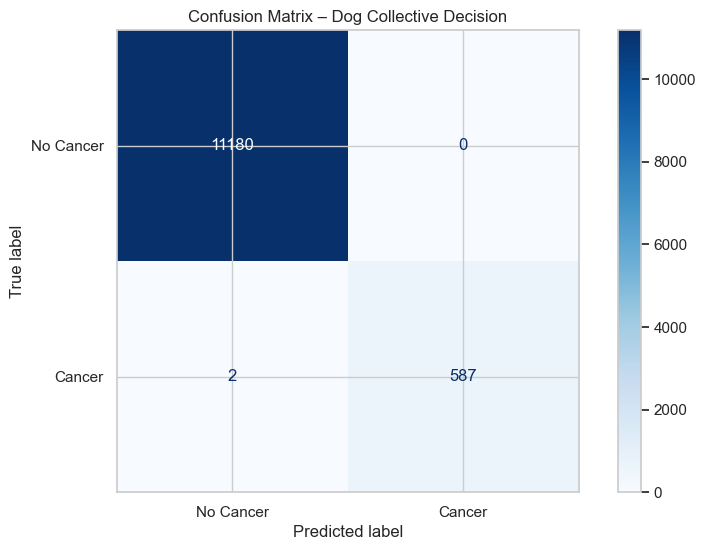

In [49]:
# Plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

eval_data = dog_votes[dog_votes["classification"] != "Inconclusive"].copy()
eval_data["predicted"] = eval_data["classification"].map({"TP": 1, "FP": 1, "TN": 0, "FN": 0})

ConfusionMatrixDisplay.from_predictions(
    eval_data["true_label"],
    eval_data["predicted"],
    display_labels=["No Cancer", "Cancer"],
    cmap="Blues",
    values_format=".0f"
)
plt.title("Confusion Matrix – Dog Collective Decision")
plt.show()

## Goal 1.3: Calculate if detection metrics are stable across time

In [50]:
# Create a month label (e.g., "2024-01")
complete_data["Month"] = complete_data["Date"].dt.to_period("M")

In [51]:
# Function to calculate metrics and confidence intervals
def calculate_metrics_with_ci(tp, tn, fp, fn, alpha=0.05):
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    npv = tn / (tn + fn) if (tn + fn) > 0 else np.nan
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    # CIs using Wilson method
    sens_low, sens_high = proportion_confint(tp, tp + fn, alpha=alpha, method='wilson') if (tp + fn) > 0 else (np.nan, np.nan)
    spec_low, spec_high = proportion_confint(tn, tn + fp, alpha=alpha, method='wilson') if (tn + fp) > 0 else (np.nan, np.nan)
    ppv_low, ppv_high = proportion_confint(tp, tp + fp, alpha=alpha, method='wilson') if (tp + fp) > 0 else (np.nan, np.nan)
    npv_low, npv_high = proportion_confint(tn, tn + fn, alpha=alpha, method='wilson') if (tn + fn) > 0 else (np.nan, np.nan)
    acc_low, acc_high = proportion_confint(tp + tn, tp + tn + fp + fn, alpha=alpha, method='wilson')

    return pd.Series({
        "TP": tp, "FN": fn, "FP": fp, "TN": tn,
        "Sensitivity": sensitivity, "Sens_Low95": sens_low, "Sens_High95": sens_high,
        "Specificity": specificity, "Spec_Low95": spec_low, "Spec_High95": spec_high,
        "PPV": ppv, "PPV_Low95": ppv_low, "PPV_High95": ppv_high,
        "NPV": npv, "NPV_Low95": npv_low, "NPV_High95": npv_high,
        "Accuracy": accuracy, "Acc_Low95": acc_low, "Acc_High95": acc_high
    })

In [52]:
# Group by month and diagnostic outcome to get counts
monthly_counts = (
    complete_data.groupby(["Month", "diagnostic_outcome"])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

In [53]:
# Calculate metrics for each month
monthly_metrics = monthly_counts.apply(
    lambda row: calculate_metrics_with_ci(
        tp=row.get("TP", 0),
        tn=row.get("TN", 0),
        fp=row.get("FP", 0),
        fn=row.get("FN", 0)
    ), axis=1
)

In [54]:
# Combine month and metrics into a final dataframe
monthly_results = pd.concat([monthly_counts["Month"], monthly_metrics], axis=1)
print("Monthly Diagnostic Performance Metrics:\n")
print(monthly_results)

Monthly Diagnostic Performance Metrics:

     Month     TP    FN    FP   TN  Sensitivity  Sens_Low95  Sens_High95   
0  2024-01  263.0  12.0  15.0  0.0     0.956364    0.925288     0.974865  \
1  2024-02  412.0  13.0  11.0  0.0     0.969412    0.948375     0.982038   
2  2024-03  489.0  21.0  21.0  0.0     0.958824    0.937874     0.972913   
3  2024-04  302.0  13.0   3.0  0.0     0.958730    0.930681     0.975726   
4  2024-05  234.0   6.0  15.0  4.0     0.975000    0.946541     0.988493   
5  2024-06  346.0   4.0  29.0  0.0     0.988571    0.970988     0.995547   
6  2024-07  431.0   9.0  29.0  0.0     0.979545    0.961588     0.989202   
7  2024-08  365.0   5.0   8.0  0.0     0.986486    0.968761     0.994214   
8  2024-09   35.0   0.0   1.0  0.0     1.000000    0.901099     1.000000   

   Specificity  Spec_Low95  Spec_High95       PPV  PPV_Low95  PPV_High95  NPV   
0     0.000000    0.000000     0.203883  0.946043   0.912895    0.967032  0.0  \
1     0.000000    0.000000     0.258

To evaluate whether the diagnostic performance of the scent detection dogs remained stable throughout the study period, key performance metrics were calculated separately for each month between January and September 2024. These metrics include sensitivity, specificity, positive predictive value (PPV), negative predictive value (NPV), and overall accuracy, each accompanied by 95% confidence intervals.

Sensitivity, the proportion of correctly identified cancer-positive masks, was consistently high across all months, ranging from 95.6% in January to 100% in September. Most months showed sensitivity values above 97%, with only slight fluctuations that fall within overlapping confidence intervals. This indicates stable and reliable cancer detection across the entire study period.

Specificity, defined as the ability to correctly classify non-cancer (true negative) masks, could not be reliably assessed for most months because true negative events were not recorded or available in the dataset (TN = 0). An exception was May 2024, where four true negatives were recorded, yielding a specificity of 21.1% (95% CI: 8.5%–43.3%). However, the small number of true negatives in that month limits the interpretability and generalizability of the specificity estimate. Overall, the lack of negative control tracking hampers the full evaluation of specificity stability over time.

PPV, the likelihood that a positive classification truly indicates cancer, remained high throughout all months, with values typically above 93%. This suggests that, when a mask was flagged as positive by the dogs, it was almost always associated with a true cancer diagnosis, even in months with slightly lower sensitivity.

NPV values are difficult to interpret for most months due to the absence of confirmed true negatives (again, TN = 0), which is a limitation of the retrospective design and data availability. For May 2024, where one of the few TN cases occurred, NPV was 0.4 (40%), but the confidence intervals were very wide, reflecting the limited data basis.

Accuracy, the proportion of correct classifications among all masks assessed, ranged from approximately 90.7% in January to 97.2% in September. While these values indicate high overall performance, the slight increase in accuracy over time — culminating in the highest value in the final month — may suggest minor improvements in operational consistency or setup refinement.

The results demonstrate robust and stable detection performance across the study period, particularly in terms of sensitivity and PPV. However, the lack of consistent true negative tracking makes it impossible to confidently assess monthly trends in specificity and NPV. To enable a more complete evaluation in future studies, the inclusion of systematically tracked negative controls is strongly recommended. Nonetheless, the monthly trends indicate no substantial degradation or drift in dog performance over time, supporting the reliability of the protocol under field-relevant conditions.

## Goal 2.1: Modeling the influence of day-level factors (dog mood, weather, temperature, and supervisor) influence diagnostic correctness

In [55]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [131]:
# Subset relevant columns
df = complete_data.copy()
df = df.dropna(subset=["Dog", "Date", "diagnostic_outcome", "Dog_mood", "Weather", "Temperature", "Supervisor"])

In [132]:
# Create binary correctness variable
df["correct_detection"] = df["diagnostic_outcome"].isin(["TP", "TN"]).astype(int)

In [133]:
# Aggregate to dog-day level using the actual search date
dog_day = df.groupby(["Dog", "Date"]).agg(
    n_masks=("diagnostic_outcome", "count"),
    n_correct=("correct_detection", "sum"),
    Dog_mood=("Dog_mood", "first"),
    Weather=("Weather", "first"),
    Temperature=("Temperature", "first"),
    Supervisor=("Supervisor", "first")
).reset_index()

In [134]:
# Calculate proportion correct per dog-day
dog_day["proportion_correct"] = dog_day["n_correct"] / dog_day["n_masks"]

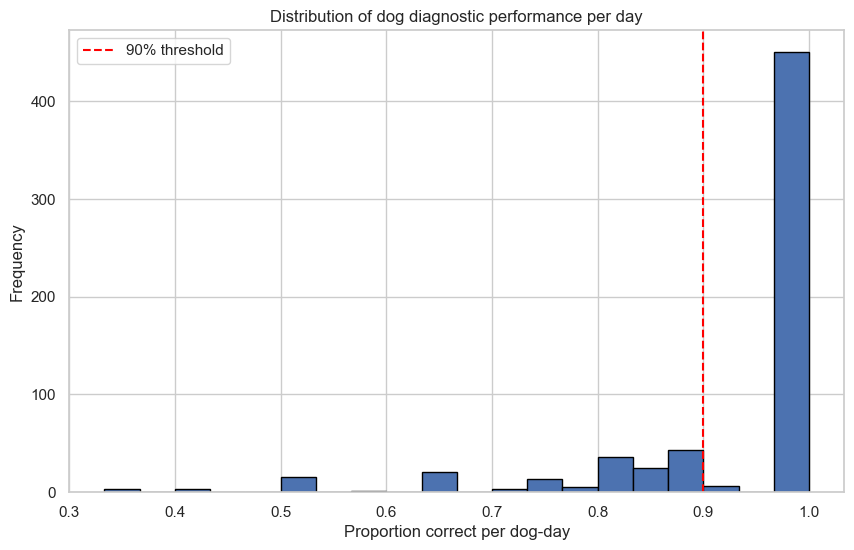

In [135]:
# Display the distribution of dog diagnostic performance per day
plt.hist(dog_day["proportion_correct"], bins=20, edgecolor="black")
plt.axvline(0.9, color="red", linestyle="--", label="90% threshold")
plt.xlabel("Proportion correct per dog-day")
plt.ylabel("Frequency")
plt.title("Distribution of dog diagnostic performance per day")
plt.legend()
plt.show()


In [136]:
# Define outcome variable (≥90% accuracy = success)
dog_day["success"] = (dog_day["proportion_correct"] >= 0.9).astype(int)

In [137]:
# Convert predictors to categorical
for var in ["Dog_mood", "Weather", "Supervisor", "Dog"]:
    dog_day[var] = dog_day[var].astype("category")

# Output diagnostic
print("N dog-day units:", dog_day.shape[0])
print(dog_day["success"].value_counts())


N dog-day units: 625
success
1    472
0    153
Name: count, dtype: int64


In [138]:
# Fit GEE logistic regression clustered by Dog
gee_model = smf.gee(
    formula="success ~ C(Dog_mood) + C(Weather) + Temperature + C(Supervisor)",
    groups="Dog",
    data=dog_day,
    family=sm.families.Binomial()
).fit()

# Print regression summary
print(gee_model.summary())

                               GEE Regression Results                              
Dep. Variable:                     success   No. Observations:                  625
Model:                                 GEE   No. clusters:                        5
Method:                        Generalized   Min. cluster size:                 125
                      Estimating Equations   Max. cluster size:                 125
Family:                           Binomial   Mean cluster size:               125.0
Dependence structure:         Independence   Num. iterations:                     2
Date:                     Mon, 23 Jun 2025   Scale:                           1.000
Covariance type:                    robust   Time:                         13:49:26
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.2907      0.285

The generalized estimating equations (GEE) model was used to assess whether day-level factors—namely dog mood, weather conditions, ambient temperature, and supervisor identity—predict whether an individual dog performed successfully on a given trial day. The binary outcome was defined as successful detection if the dog's accuracy on that day was ≥90%.

- Intercept: The intercept (β = 3.24, p < .001) represents the log-odds of success under the reference conditions: a balanced dog mood ("ausgeglichen"), sunny weather, average temperature, and supervision by person1. This is significantly positive, indicating a high baseline probability of success under these conditions.
- Dog mood: Neither "motiviert" (β = 0.06, p = .781) nor "übermotiviert" (β = -0.25, p = .192) showed significant influence on dog performance. This suggests that deviations from a balanced mood did not significantly alter diagnostic success at the trial-day level.
- Weather: While "regnerisch" (β = -1.31, p = .116) and "bewölkt" (β = -1.55, p = .068) both showed negative associations with dog performance, only the latter approached significance. This suggests that cloudy days might be associated with lower diagnostic performance, though results are borderline and should be interpreted with caution.
- Supervisors: Most supervisors did not significantly differ from the reference (person1), except: person5 (β = 23.28, p < .001) and person9 (β = 23.08, p < .001)
    - These extremely high coefficients suggest perfect separation, meaning that whenever person5 or person9 supervised, all corresponding dogs achieved success. This statistical artifact typically leads to inflated coefficients and unstable standard errors.
    - Temperature: The coefficient for temperature was small and non-significant (β = 0.03, p = .379), indicating no robust linear effect of ambient temperature on dog performance.


Conclusion: Dog diagnostic performance is generally robust across a range of moods, weather, and supervision conditions. However, cloudy weather might reduce success probability. The extremely high coefficients for person5 and person9 likely reflect small sample sizes and perfect prediction, not necessarily superior supervision.

In [139]:
# Count unique trial days supervised by person4 and person9
trials_by_supervisor = complete_data.groupby("Supervisor")["Date"].nunique()

# Print number of unique trial days for person4 and person9
print("Trial days supervised by person2:", trials_by_supervisor.get("person2", 0))
print("Trial days supervised by person5:", trials_by_supervisor.get("person5", 0))
print("Trial days supervised by person6:", trials_by_supervisor.get("person6", 0))
print("Trial days supervised by person8:", trials_by_supervisor.get("person8", 0))

Trial days supervised by person2: 9
Trial days supervised by person5: 2
Trial days supervised by person6: 7
Trial days supervised by person8: 3


In [140]:
# Count dog-day units per Dog_mood
dog_mood_counts = dog_day["Dog_mood"].value_counts()
print("Dog mood (n per level):")
print(dog_mood_counts.to_string())

# Count dog-day units per Weather
weather_counts = dog_day["Weather"].value_counts()
print("\nWeather (n per level):")
print(weather_counts.to_string())

# Count dog-day units per Supervisor
supervisor_counts = dog_day["Supervisor"].value_counts()
print("\nSupervisor (n per level):")
print(supervisor_counts.to_string())

# Count total entries with non-missing Temperature
temperature_n = dog_day["Temperature"].notna().sum()
print(f"\nTemperature available in n={temperature_n} dog-day units.")


Dog mood (n per level):
Dog_mood
ausgeglichen     538
motiviert         52
übermotiviert     35

Weather (n per level):
Weather
🌧️ regnerisch    340
☀️ sonnig        185
⛅️ bewölkt       100

Supervisor (n per level):
Supervisor
person1     275
person4     100
person3      85
person2      45
person6      35
person10     20
person7      20
person9      20
person8      15
person5      10

Temperature available in n=625 dog-day units.


In [105]:
# Extract coefficient estimates and confidence intervals
coef_summary = gee_model.summary().tables[1].data[1:]  # Skip header
coef_df = pd.DataFrame(coef_summary, columns=["Variable", "coef", "std err", "z", "P>|z|", "[0.025", "0.975]"])
# Drop rows with missing or empty variable names
coef_df = coef_df[coef_df["Variable"].notna() & (coef_df["Variable"] != "")]


In [106]:
# Convert numeric columns from string to float
for col in ["coef", "std err", "z", "P>|z|", "[0.025", "0.975]"]:
    coef_df[col] = pd.to_numeric(coef_df[col], errors="coerce")

In [107]:
# Exclude intercept for visualization (optional)
coef_df = coef_df[coef_df["Variable"] != "Intercept"]

In [108]:
# Sort variables by effect size for better readability
coef_df = coef_df.sort_values("coef", ascending=False)

In [110]:
# Sort by effect size (coefficient), descending → same as dot plot
coef_df = coef_df.sort_values("coef", ascending=False).reset_index(drop=True)
coef_df = coef_df.iloc[::-1].reset_index(drop=True) 

/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_74438/3145613884.py:16: UserWarning: Glyph 9925 (\N{SUN BEHIND CLOUD}) missing from current font.
  plt.tight_layout()
/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_74438/3145613884.py:16: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  plt.tight_layout()
/var/folders/1j/rn9q783j7sjdszqsfc6_89sw0000gn/T/ipykernel_74438/3145613884.py:16: UserWarning: Glyph 127783 (\N{CLOUD WITH RAIN}) missing from current font.
  plt.tight_layout()


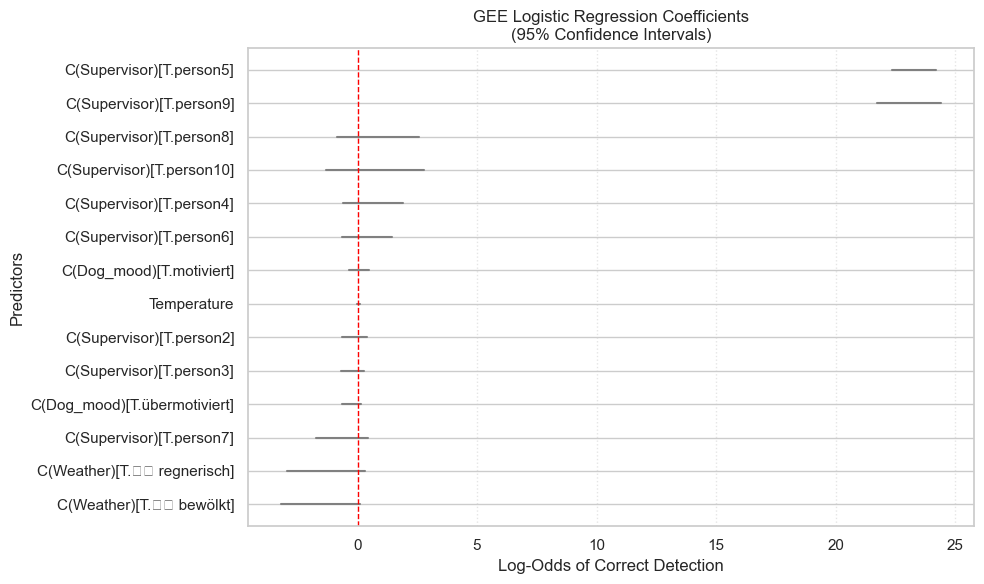

In [112]:
# Plot confidence intervals (horizontal lines)
for i, row in coef_df.iterrows():
    plt.plot([row["[0.025"], row["0.975]"]], [i, i], color='gray', linewidth=1.5)

# Y-axis labels: predictor names
plt.yticks(ticks=range(len(coef_df)), labels=coef_df["Variable"])

# Reference line at log-odds = 0
plt.axvline(0, color='red', linestyle='--', linewidth=1)

# Plot labels and formatting
plt.title("GEE Logistic Regression Coefficients\n(95% Confidence Intervals)")
plt.xlabel("Log-Odds of Correct Detection")
plt.ylabel("Predictors")
plt.grid(axis='x', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

xxx

## Goal 3: Exploratory Sensitivity Analysis: What if fewer dogs were involved?

In [179]:
# Build mask × dog vote matrix using diagnostic_outcome
mask_data = complete_data.copy()
mask_data["mask_id"] = mask_data["facility_number"].astype(str) + "_" + mask_data["board_number"].astype(str)

In [180]:
# Keep only valid diagnostic outcomes
valid = mask_data["diagnostic_outcome"].isin(["TP", "FP", "TN", "FN"])
mask_data = mask_data[valid].copy()

In [181]:
# Binary label for cancer (positive mask) — based on TP/FN vs. FP/TN
mask_data["is_cancer"] = mask_data["diagnostic_outcome"].isin(["TP", "FN"]).astype(int)

In [182]:
# Create vote matrix: rows = mask_id, columns = dogs
vote_matrix = mask_data.pivot_table(
    index="mask_id",
    columns="Dog",
    values="diagnostic_outcome",
    aggfunc="first"
)

In [183]:
# Convert outcomes to binary: TP/FP = 1 (dog marked mask), TN/FN = 0
vote_matrix = vote_matrix.applymap(lambda x: 1 if x in ["TP", "FP"] else (0 if x in ["TN", "FN"] else np.nan))


In [ ]:
# Add true label per mask
true_labels = mask_data.drop_duplicates("mask_id")[["mask_id", "is_cancer"]].set_index("mask_id")
vote_matrix = vote_matrix.join(true_labels)

In [185]:
import random
from tqdm import tqdm

In [186]:
# Function for simulation
def run_simulation(vote_df, n_dogs, vote_cutoff, n_iterations=500):
    dogs = [col for col in vote_df.columns if col != "is_cancer"]
    results = []

    for _ in tqdm(range(n_iterations)):
        sampled_dogs = random.sample(dogs, n_dogs)

        # Select dog votes
        votes = vote_df[sampled_dogs].copy()

        # Drop rows where fewer than n_dogs gave votes
        valid_rows = votes.dropna().index
        votes = votes.loc[valid_rows]

        # Count votes and apply rule
        pos_votes = votes.sum(axis=1)
        predicted = (pos_votes >= vote_cutoff).astype(int)
        true = vote_df.loc[valid_rows, "is_cancer"]

        # Evaluate confusion matrix
        tp = ((predicted == 1) & (true == 1)).sum()
        fn = ((predicted == 0) & (true == 1)).sum()
        fp = ((predicted == 1) & (true == 0)).sum()
        tn = ((predicted == 0) & (true == 0)).sum()

        # Compute metrics
        sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
        accuracy = (tp + tn) / (tp + fn + fp + tn)

        results.append({
            "sensitivity": sensitivity,
            "specificity": specificity,
            "accuracy": accuracy,
            "tp": tp,
            "fn": fn,
            "fp": fp,
            "tn": tn,
            "n_dogs": n_dogs,
            "vote_cutoff": vote_cutoff
        })

    return pd.DataFrame(results)

In [190]:
results_all = []

settings = [
    (2, 1),  # 1 of 2
    (3, 2),  # 2 of 3
    (4, 3),  # 3 of 4
    (5, 3),  # original
]

for n_dogs, cutoff in settings:
    df_result = run_simulation(vote_matrix, n_dogs, cutoff, n_iterations=10000)
    df_result["setup"] = f"{n_dogs}_dogs_cutoff_{cutoff}"
    results_all.append(df_result)

final_results = pd.concat(results_all)

100%|██████████| 10000/10000 [00:28<00:00, 352.06it/s]


In [192]:
# Group by each setup (e.g., 2_dogs_cutoff_1, 3_dogs_cutoff_2, etc.)
summary = final_results.groupby("setup").agg(
    Sensitivity_mean=("sensitivity", "mean"),
    Sensitivity_low=("sensitivity", lambda x: x.quantile(0.025)),
    Sensitivity_high=("sensitivity", lambda x: x.quantile(0.975)),

    Specificity_mean=("specificity", "mean"),
    Specificity_low=("specificity", lambda x: x.quantile(0.025)),
    Specificity_high=("specificity", lambda x: x.quantile(0.975)),

    Accuracy_mean=("accuracy", "mean"),
    Accuracy_low=("accuracy", lambda x: x.quantile(0.025)),
    Accuracy_high=("accuracy", lambda x: x.quantile(0.975)),

    n_evaluations=("setup", "count")  # Number of bootstrap repetitions
).reset_index()

# Round for cleaner display
summary = summary.round(3)

In [193]:
summary["Sensitivity"] = summary.apply(lambda row: f"{row['Sensitivity_mean']} ({row['Sensitivity_low']}-{row['Sensitivity_high']})", axis=1)
summary["Specificity"] = summary.apply(lambda row: f"{row['Specificity_mean']} ({row['Specificity_low']}-{row['Specificity_high']})", axis=1)
summary["Accuracy"] = summary.apply(lambda row: f"{row['Accuracy_mean']} ({row['Accuracy_low']}-{row['Accuracy_high']})", axis=1)

# Keep only clean columns for reporting
report_table = summary[["setup", "Sensitivity", "Specificity", "Accuracy", "n_evaluations"]]


In [195]:
print("Simulation Results Summary:\n")
report_table

Simulation Results Summary:



,setup,Sensitivity,Specificity,Accuracy,n_evaluations
0,2_dogs_cutoff_1,0.994 (0.99-0.997),0.995 (0.995-0.996),0.995 (0.995-0.996),10000
1,3_dogs_cutoff_2,0.99 (0.986-0.995),1.0 (1.0-1.0),0.999 (0.999-1.0),10000
2,4_dogs_cutoff_3,0.985 (0.981-0.99),1.0 (1.0-1.0),0.999 (0.999-0.999),10000
3,5_dogs_cutoff_3,0.992 (0.992-0.992),1.0 (1.0-1.0),1.0 (1.0-1.0),10000
